In [2]:
# LIBRARIES

import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from matplotlib import cm
from matplotlib.ticker import MaxNLocator

# from matplotlib.animation import FuncAnimation


numpy: 1.21.5
matplotlib: 3.5.1


/tmp/ipykernel_28233/2718183042.py:13: RuntimeWarning: divide by zero encountered in log
  log_i_values.append(np.log(i) / np.log(10))


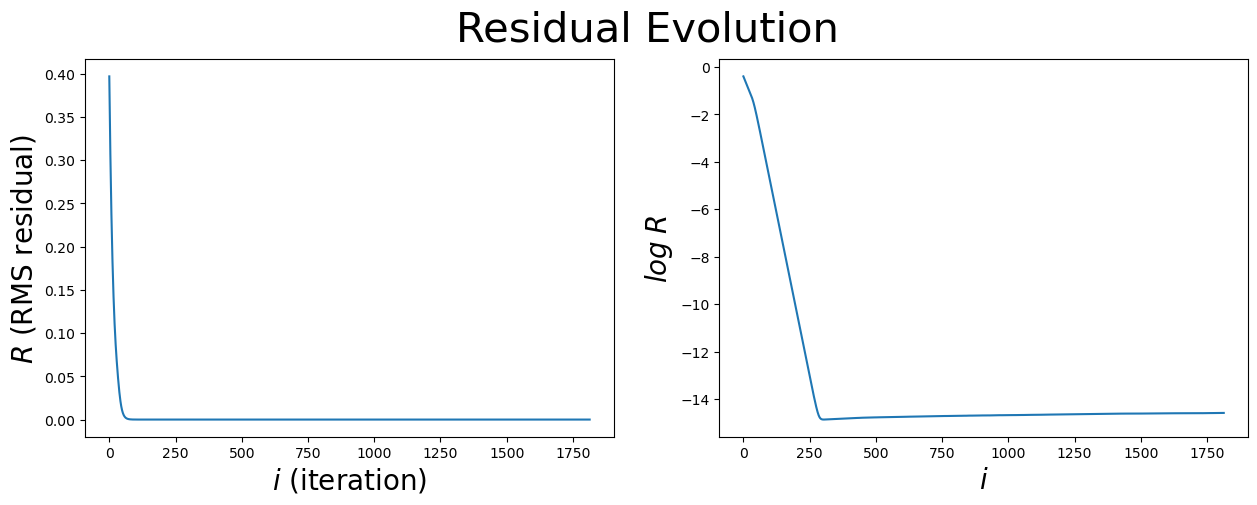

In [7]:
# RESIDUAL EVOLUTION

fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('residuals.csv', delimiter=',')

i_values = entries[:,0]
residuals = entries[:,1]
log_i_values = []
log_residuals = []

for i in i_values:
	log_i_values.append(np.log(i) / np.log(10))

for residual in residuals:
	log_residuals.append(np.log(residual) / np.log(10))

ax1.plot(i_values, residuals)
ax1.set(xlabel='$i$ (iteration)', ylabel='$R$ (RMS residual)')
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)

ax2.plot(i_values, log_residuals)
ax2.set(xlabel='$i$', ylabel='$log \; R$')
# ax2.plot(log_i_values, log_residuals)
# ax2.set(xlabel='$\log \; i$', ylabel='$\log \; R$')
ax2.xaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

fig.suptitle('Residual Evolution', fontsize=30)
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

plt.show()

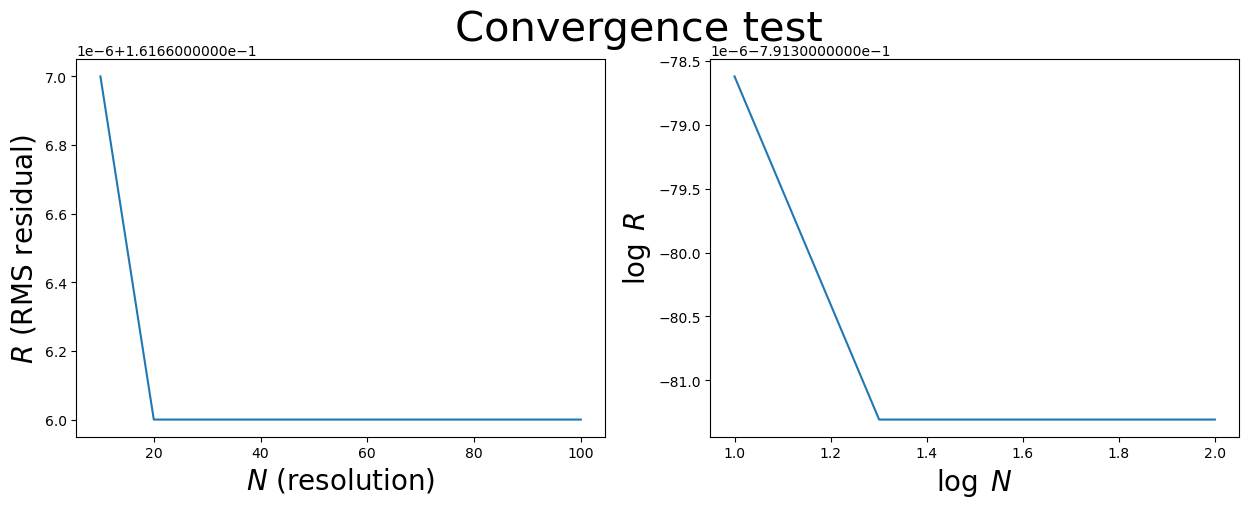

In [33]:
# CONVERGENCE TEST

fig, (ax1, ax2) = plt.subplots(1,2)

entries = np.genfromtxt('convergence.csv', delimiter=',')

N_values = entries[:,0]
residuals = entries[:,1]
log_N_values = []
log_residuals = []

for N in N_values:
	log_N_values.append(np.log(N) / np.log(10))

for residual in residuals:
	log_residuals.append(np.log(residual) / np.log(10))

ax1.plot(N_values, residuals)
ax1.set(xlabel='$N$ (resolution)', ylabel='$R$ (RMS residual)')
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)

# ax2.plot(N_values, log_residuals)
# ax2.set(xlabel='$N$', ylabel='$log \; R$')
ax2.plot(log_N_values, log_residuals)
ax2.set(xlabel='$\log \; N$', ylabel='$\log \; R$')
ax2.xaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

fig.suptitle('Convergence test', fontsize=30)
fig.set_size_inches(15, 5, forward=True)
fig.set_dpi(100)

plt.show()

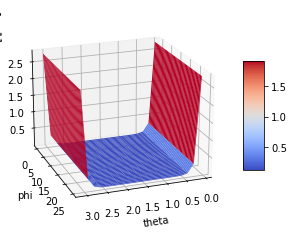

In [6]:
# RESIDUAL DISTRIBUTION ANIMATION

entries = np.genfromtxt('residual_distribution.csv', delimiter=',')

x = entries[0]
y = entries[1]

unique_x = list(set(x))
unique_y = list(set(y))
unique_x.sort()
unique_y.sort()

z = np.zeros((len(unique_x), len(unique_y), len(entries) - 2))

for row in range(2, len(entries)):
	for col in range(len(entries[row])):
		x_index = unique_x.index(x[col])
		y_index = unique_y.index(y[col])
		z[x_index][y_index][row-2] = entries[row][col]

maxFrame = z.shape[2]
X, Y = np.meshgrid(unique_x, unique_y, indexing='ij')

def update_plot(frame_number, z, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, z[:,:,frame_number%maxFrame], cmap=cm.coolwarm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, z[:,:,0], color='0.75', rstride=1, cstride=1, cmap=cm.coolwarm)]

ax.set_xlabel("theta")
ax.set_ylabel("phi")
ax.view_init(20, 70) # elev, azim
fig.colorbar(plot[0], shrink=0.5, aspect=5)

fps = 10 # frame per sec
frn = 50 # frame number of the animation
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(z, plot), interval=100/fps)

fn = 'residual_distribution_animation' # filename
dpi = 200 # dots per inch
ani.save(fn+'.gif',writer='imagemagick',fps=fps, dpi=dpi)